Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [12]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
    # Your Code
    def on_epoch_end(self, epoch, logs={}):
         if(logs.get('acc')>DESIRED_ACCURACY):
            print("\nReached {}% accuracy so cancelling training!".format(DESIRED_ACCURACY*100))
            self.model.stop_training = True

--2019-04-26 16:43:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-04-26 16:43:52 (148 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [13]:
os.listdir('/tmp/h-or-s')

['happy', 'sad']

In [0]:
# Directory with our training horse pictures
train_sad_dir = '/tmp/h-or-s/sad'
train_sad_names = os.listdir(train_sad_dir)

# Directory with our training human pictures
train_happy_dir = '/tmp/h-or-s/happy'
train_happy_names = os.listdir(train_happy_dir)

In [15]:
len(train_sad_names), len(train_happy_names)

(40, 40)

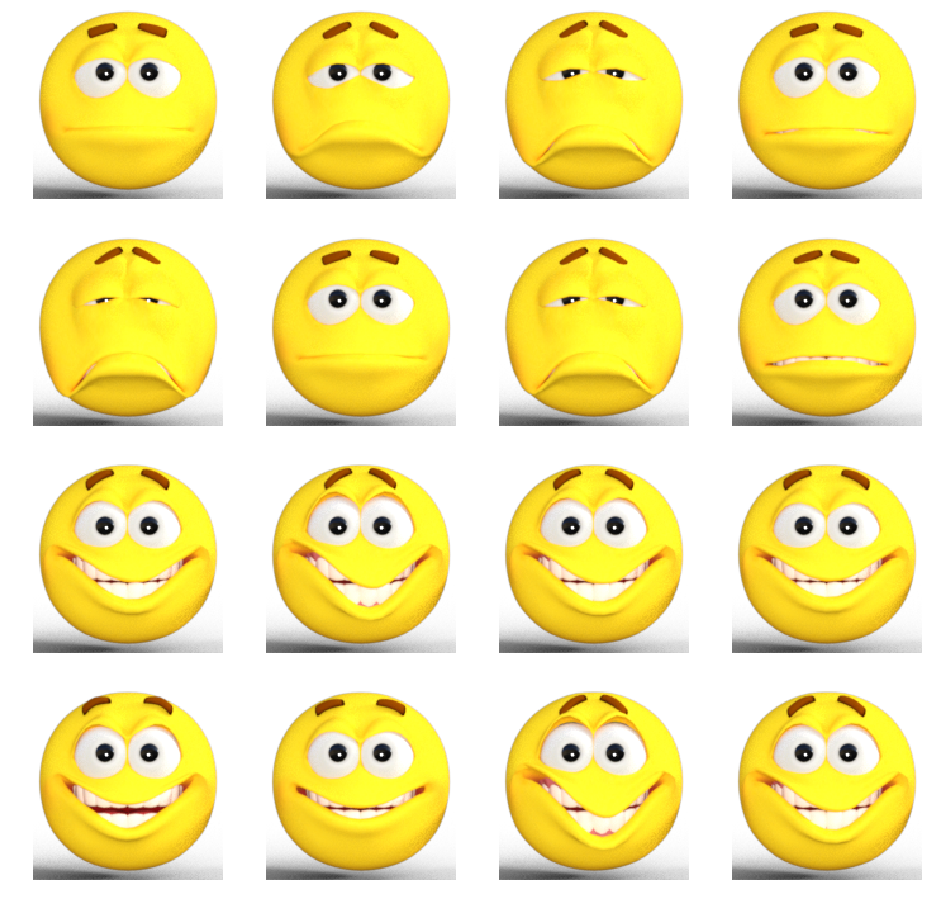

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0



# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                     for fname in train_sad_names[pic_index-8:pic_index]]
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                     for fname in train_happy_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sad_pix+next_happy_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [17]:
import cv2

im = cv2.imread('/tmp/h-or-s/sad/sad1-18.png')
im.shape

(150, 150, 3)

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    # Your Code Here
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('happy') and 1 for the other ('sad')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [19]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        # Your Code Here    
        '/tmp/h-or-s/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [20]:
#create callback
mycallback = myCallback()
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
        # Your Code Here
        train_generator,
        steps_per_epoch=2,  
        epochs=20,
        verbose=1,
        callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
8/8 [==============================] - 3s 388ms/step - loss: 1.2358 - acc: 0.6750
Epoch 2/20
8/8 [==============================] - 3s 358ms/step - loss: 0.3347 - acc: 0.8875
Epoch 3/20
8/8 [==============================] - 3s 359ms/step - loss: 0.1097 - acc: 0.9750
Epoch 4/20
8/8 [==============================] - 3s 357ms/step - loss: 0.0790 - acc: 0.9875
Epoch 5/20
8/8 [==============================] - 3s 358ms/step - loss: 0.1168 - acc: 0.9250
Epoch 6/20
8/8 [==============================] - 3s 356ms/step - loss: 0.1719 - acc: 0.9125
Epoch 7/20
7/8 [=========================>....] - ETA: 0s - loss: 0.0241 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 3s 358ms/step - loss: 0.0235 - acc: 1.0000
